# run_scalar.py Simple

Setting up a new session...


Epoch  0  loss  35.790167358208095 correct 27
Epoch  10  loss  33.07788862404975 correct 37
Epoch  20  loss  29.99818304331403 correct 45
Epoch  30  loss  23.083477679990256 correct 46
Epoch  40  loss  14.669661480235774 correct 47
Epoch  50  loss  10.008723682808341 correct 48
Epoch  60  loss  14.387002846655257 correct 42
Epoch  70  loss  9.26332310810202 correct 46
Epoch  80  loss  7.3014622830614835 correct 47
Epoch  90  loss  11.167080790236 correct 43
Epoch  100  loss  8.364677441541433 correct 45
Epoch  110  loss  7.9021226851290045 correct 45
Epoch  120  loss  8.069949670104764 correct 45
Epoch  130  loss  7.514728224322256 correct 45
Epoch  140  loss  7.274177257425502 correct 46
Epoch  150  loss  7.087083815930848 correct 47
Epoch  160  loss  6.858524801676795 correct 47
Epoch  170  loss  6.665064723673473 correct 47
Epoch  180  loss  6.506405400902233 correct 47
Epoch  190  loss  6.356091555404533 correct 47
Epoch  200  loss  6.217794002073816 correct 47
Epoch  210  loss  6.

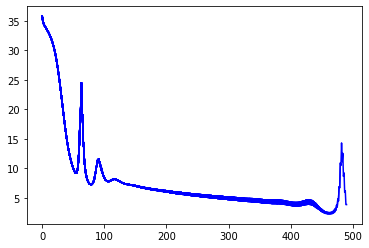

In [1]:
"""
Be sure you have minitorch installed in you Virtual Env.
>>> pip install -Ue .
"""
import minitorch
import matplotlib.pyplot as plt
import random
import datasets

PTS = 50
DATASET = datasets.Simple(PTS, vis=True)
HIDDEN = 2
RATE = 0.5


class Network(minitorch.Module):
    def __init__(self):
        super().__init__()

        # Submodules
        self.layer1 = Linear(2, HIDDEN)
        self.layer2 = Linear(HIDDEN, HIDDEN)
        self.layer3 = Linear(HIDDEN, 1)

    def forward(self, x):
        h = [h.relu() for h in self.layer1.forward(x)]
        h = [h.relu() for h in self.layer2.forward(h)]
        return self.layer3.forward(h)[0].sigmoid()


class Linear(minitorch.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.weights = []
        self.bias = []
        for i in range(in_size):
            self.weights.append([])
            for j in range(out_size):
                self.weights[i].append(
                    self.add_parameter(
                        f"weight_{i}_{j}", minitorch.Scalar(2 * (random.random() - 0.5))
                    )
                )
        for j in range(out_size):
            self.bias.append(
                self.add_parameter(
                    f"bias_{j}", minitorch.Scalar(2 * (random.random() - 0.5))
                )
            )

    def forward(self, inputs):
        y = [b.value for b in self.bias]
        for i, x in enumerate(inputs):
            for j in range(len(y)):
                y[j] = y[j] + x * self.weights[i][j].value
        return y


model = Network()
data = DATASET
losses = []
for epoch in range(500):
    total_loss = 0.0
    correct = 0

    # Forward
    for i in range(data.N):
        x_1, x_2 = data.X[i]
        y = data.y[i]
        x_1 = minitorch.Scalar(x_1)
        x_2 = minitorch.Scalar(x_2)
        out = model.forward((x_1, x_2))

        if y == 1:
            prob = out
            correct += 1 if out.data > 0.5 else 0
        else:
            prob = -out + 1.0
            correct += 1 if out.data < 0.5 else 0

        loss = -prob.log()
        loss.backward()
        total_loss += loss.data

    # Update
    losses.append(total_loss)
    for p in model.parameters():
        if p.value.derivative is not None:
            p.update(
                minitorch.Scalar(p.value.data - RATE * (p.value.derivative / data.N))
            )

    # Logging
    if epoch % 10 == 0:
        print("Epoch ", epoch, " loss ", total_loss, "correct", correct)
        im = f"Epoch: {epoch}"
        data.graph(
            im,
            lambda x: model.forward(
                (minitorch.Scalar(x[0]), minitorch.Scalar(x[1]))
            ).data,
        )
        plt.plot(losses, c="blue")
        data.vis.matplot(plt, win="loss")


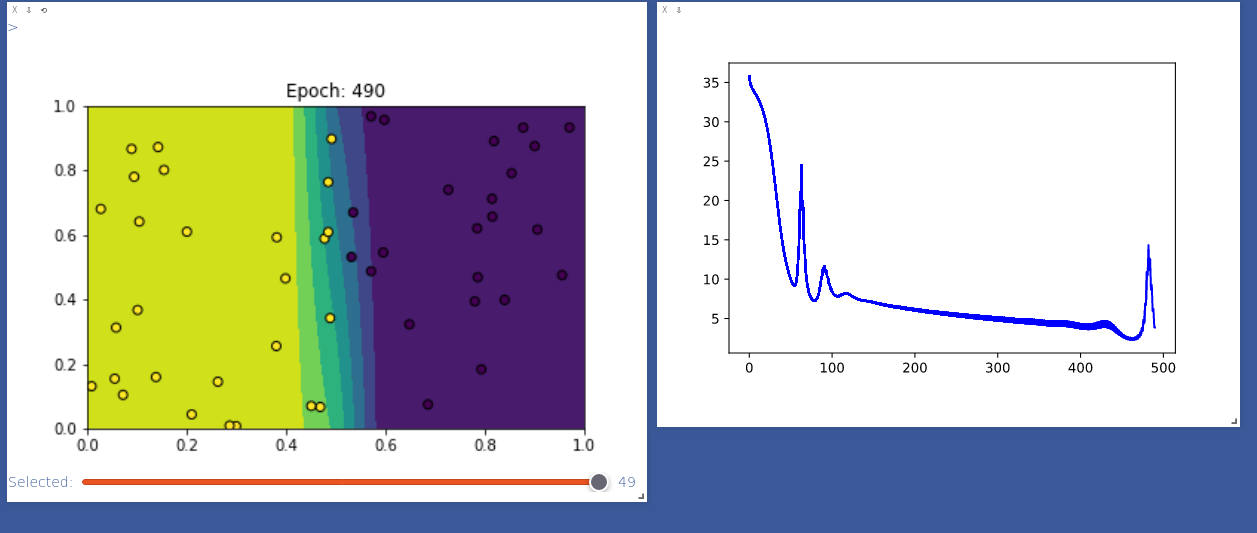

# run_scalar.py Xor

Setting up a new session...


Epoch  0  loss  35.78241327582452 correct 23
Epoch  10  loss  29.72139044316627 correct 35
Epoch  20  loss  27.67202512225613 correct 40
Epoch  30  loss  25.265342491454774 correct 40
Epoch  40  loss  24.44112224288428 correct 37
Epoch  50  loss  22.751882985388818 correct 36
Epoch  60  loss  21.451512112983554 correct 39
Epoch  70  loss  22.667616266567773 correct 37
Epoch  80  loss  18.456721082403746 correct 40
Epoch  90  loss  20.829520338016856 correct 42
Epoch  100  loss  17.72764982088876 correct 40
Epoch  110  loss  15.82840446398279 correct 40
Epoch  120  loss  16.251656635137874 correct 40
Epoch  130  loss  16.18442692194458 correct 40
Epoch  140  loss  16.466628458171705 correct 41
Epoch  150  loss  15.8987676461709 correct 41
Epoch  160  loss  15.085171895707429 correct 42
Epoch  170  loss  14.350045885059153 correct 42
Epoch  180  loss  12.301707166070484 correct 43
Epoch  190  loss  14.099747226959765 correct 42
Epoch  200  loss  13.72299249479364 correct 42
Epoch  210  l

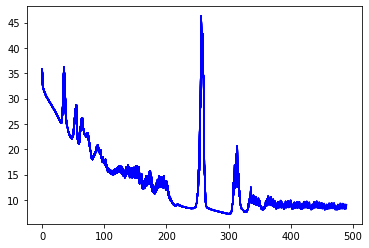

In [3]:
"""
Be sure you have minitorch installed in you Virtual Env.
>>> pip install -Ue .
"""
import minitorch
import matplotlib.pyplot as plt
import random
import datasets

PTS = 50
DATASET = datasets.Xor(PTS, vis=True)
HIDDEN = 10
RATE = 0.5


class Network(minitorch.Module):
    def __init__(self):
        super().__init__()

        # Submodules
        self.layer1 = Linear(2, HIDDEN)
        self.layer2 = Linear(HIDDEN, HIDDEN)
        self.layer3 = Linear(HIDDEN, 1)

    def forward(self, x):
        h = [h.relu() for h in self.layer1.forward(x)]
        h = [h.relu() for h in self.layer2.forward(h)]
        return self.layer3.forward(h)[0].sigmoid()


class Linear(minitorch.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.weights = []
        self.bias = []
        for i in range(in_size):
            self.weights.append([])
            for j in range(out_size):
                self.weights[i].append(
                    self.add_parameter(
                        f"weight_{i}_{j}", minitorch.Scalar(2 * (random.random() - 0.5))
                    )
                )
        for j in range(out_size):
            self.bias.append(
                self.add_parameter(
                    f"bias_{j}", minitorch.Scalar(2 * (random.random() - 0.5))
                )
            )

    def forward(self, inputs):
        y = [b.value for b in self.bias]
        for i, x in enumerate(inputs):
            for j in range(len(y)):
                y[j] = y[j] + x * self.weights[i][j].value
        return y


model = Network()
data = DATASET
losses = []
for epoch in range(500):
    total_loss = 0.0
    correct = 0

    # Forward
    for i in range(data.N):
        x_1, x_2 = data.X[i]
        y = data.y[i]
        x_1 = minitorch.Scalar(x_1)
        x_2 = minitorch.Scalar(x_2)
        out = model.forward((x_1, x_2))

        if y == 1:
            prob = out
            correct += 1 if out.data > 0.5 else 0
        else:
            prob = -out + 1.0
            correct += 1 if out.data < 0.5 else 0

        loss = -prob.log()
        loss.backward()
        total_loss += loss.data

    # Update
    losses.append(total_loss)
    for p in model.parameters():
        if p.value.derivative is not None:
            p.update(
                minitorch.Scalar(p.value.data - RATE * (p.value.derivative / data.N))
            )

    # Logging
    if epoch % 10 == 0:
        print("Epoch ", epoch, " loss ", total_loss, "correct", correct)
        im = f"Epoch: {epoch}"
        data.graph(
            im,
            lambda x: model.forward(
                (minitorch.Scalar(x[0]), minitorch.Scalar(x[1]))
            ).data,
        )
        plt.plot(losses, c="blue")
        data.vis.matplot(plt, win="loss")


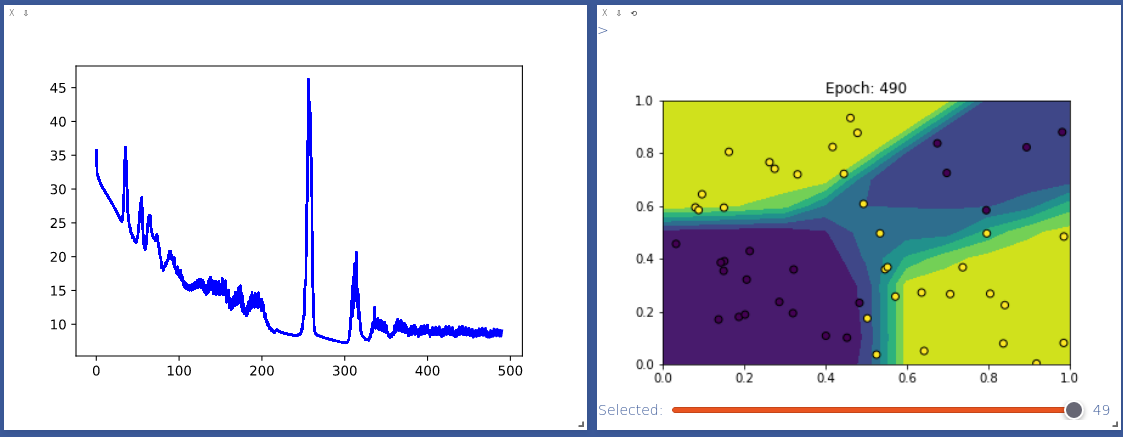